In [1]:
# !"/usr/local/bin/python3.8" -m pip list
# !"/usr/local/bin/python3.8" -m pip install nbconvert
# !"/usr/local/bin/python3.8" -m pip uninstall plotly

# Clustering von Spotify-Songs with DBSCAN

# Quelle des Datensatzes
https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021?select=spotify_dataset.csv

The dataset include all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The dataset include the following features:
- Highest Charting Position: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Week of Highest Charting: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song Name: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song iD: The song ID provided by Spotify (unique to each song).
- Streams: Approximate number of streams the song has.
- Artist: The main artist/ artists involved in making the song.
- Artist Followers: The number of followers the main artist has on Spotify.
- Genre: The genres the song belongs to.
- Release Date: The initial date that the song was released.
- Weeks Charted: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Popularity:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Chord: The main chord of the song instrumental.
Acknowledgements- This dataset would not be possible without the help of spotifycharts.com and Spotipy Python Library

Überblick über den Datensatz:
- .head()
- .info()
- .describe()

## Erster Überblick über den Datensatz

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./daten/spotify_dataset.csv', sep=",").drop('Index', axis = 1)
display(df.head())
df = df.dropna()

Highest Charting Position  Number of Times Charted  \
0                          1                        8   
1                          2                        3   
2                          1                       11   
3                          3                        5   
4                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   

                                    Genre Release Date  ... Danceability  \
0  ['indie rock italiano', 'italian pop']   2017-12-08  ...        0.714   
1                  ['australian hip hop']   2021-07-09  ...        0.591   
2                                 ['pop']   2021-05-21  ...        0.563   
3                       ['pop', 'uk pop']   2021-06-25  ...        0.808   
4           ['lgbtq+ hip hop', 'pop rap']   2021-07-23  ...        0.736   

  Energy Loudness Speechiness Acousticness Liveness    Tempo Duration (ms)  \
0    0.8   -4.808      0.0504        0.127    0.359  134.002        211560   
1  0.764   -5.484      0.0483       0.0383    0.103  169.928        141806   
2  0.664   -5.044       0.154        0.335   0.0849  166.928        178147   
3  0.897   -3.712      0.0348       0.0469    0.364  126.026        231041   
4  0.704   -7.409      0.0615       0.0203   0.0501  149.995        212000   

  Valence  Chord  
0   0.589      B  
1   0.478  C#/Db  
2   0.688      A  
3   0.591      B  
4   0.894  D#/Eb  

[5 rows x 22 columns]

## Data Preparation

In [4]:
# leere Werte löschen
df = df.drop([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538])

# lösche Zeilen ohne Genres
print("Länge des Spotify Datensatztes", len(df))
df = df[df.Genre != '[]']
print("Länge des Spotify Datensatztes", len(df))


#df columns dateype convert
df[['Artist Followers', 'Number of Times Charted', 'Duration (ms)', 'Popularity']] = df[['Artist Followers', 'Number of Times Charted', 'Duration (ms)', 'Popularity']].apply(pd.to_numeric)
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']] = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].astype('float')
df[['Song Name', 'Artist','Song ID', 'Chord']] = df[['Song Name', 'Artist','Song ID', 'Chord']].astype('string')


df['Duration(s)'] = df['Duration (ms)']/1000

#Streams in int umwandeln
df['Streams'] = df['Streams'].replace(',','', regex=True)
df['Streams'] = df['Streams'].astype('int64')

#devide the Date
df[['Start Highest Charting', 'End Highest Charting']]= df['Week of Highest Charting'].str.split('--', expand = True)

#add datatype Date
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Start Highest Charting'] = pd.to_datetime(df['Start Highest Charting'])
df['End Highest Charting'] = pd.to_datetime(df['End Highest Charting'])

df['Start Highest Charting'] = pd.to_numeric(df['Start Highest Charting'])
df['Release Date'] = pd.to_numeric(df['Release Date'])

Länge des Spotify Datensatztes 1545
Länge des Spotify Datensatztes 1470


In [52]:
df.head()

Highest Charting Position  Number of Times Charted  \
0                          1                        8   
1                          2                        3   
2                          1                       11   
3                          3                        5   
4                          5                        1   

  Week of Highest Charting                          Song Name   Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48633449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47248719   
2   2021-06-25--2021-07-02                           good 4 u  40162559   
3   2021-07-02--2021-07-09                         Bad Habits  37799456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33948454   

           Artist  Artist Followers                 Song ID  \
0        Måneskin           3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI           2230022  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo           6266514  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran          83293380  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X           5473565  27NovPIUIRrOZoCHxABJwK   

                                    Genre         Release Date  ...  \
0  ['indie rock italiano', 'italian pop']  1512691200000000000  ...   
1                  ['australian hip hop']  1625788800000000000  ...   
2                                 ['pop']  1621555200000000000  ...   
3                       ['pop', 'uk pop']  1624579200000000000  ...   
4           ['lgbtq+ hip hop', 'pop rap']  1626998400000000000  ...   

  Speechiness  Acousticness  Liveness    Tempo  Duration (ms)  Valence  Chord  \
0      0.0504        0.1270    0.3590  134.002         211560    0.589      B   
1      0.0483        0.0383    0.1030  169.928         141806    0.478  C#/Db   
2      0.1540        0.3350    0.0849  166.928         178147    0.688      A   
3      0.0348        0.0469    0.3640  126.026         231041    0.591      B   
4      0.0615        0.0203    0.0501  149.995         212000    0.894  D#/Eb   

   Duration(s)  Start Highest Charting  End Highest Charting  
0      211.560     1626998400000000000            2021-07-30  
1      141.806     1626998400000000000            2021-07-30  
2      178.147     1624579200000000000            2021-07-02  
3      231.041     1625184000000000000            2021-07-09  
4      212.000     1626998400000000000            2021-07-30  

[5 rows x 25 columns]

## Daten logarithmieren

In [49]:
df[['Loudness']] = df[['Loudness']]*(-1)

df[['Streams', 'Artist Followers', 'Release Date', 'Number of Times Charted', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Duration(s)', 'Start Highest Charting']] = np.log10(df[['Streams', 'Artist Followers', 'Release Date', 'Number of Times Charted', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Duration(s)', 'Start Highest Charting']])

In [7]:
df.head()

Highest Charting Position  Number of Times Charted  \
0                          1                 0.903090   
1                          2                 0.477121   
2                          1                 1.041393   
3                          3                 0.698970   
4                          5                 0.000000   

  Week of Highest Charting                          Song Name   Streams  \
0   2021-07-23--2021-07-30                            Beggin'  7.686935   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  7.674390   
2   2021-06-25--2021-07-02                           good 4 u  7.603821   
3   2021-07-02--2021-07-09                         Bad Habits  7.577486   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  7.530820   

           Artist  Artist Followers                 Song ID  \
0        Måneskin          6.528629  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          6.348309  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo          6.797026  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran          7.920610  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X          6.738270  27NovPIUIRrOZoCHxABJwK   

                                    Genre  Release Date  ... Speechiness  \
0  ['indie rock italiano', 'italian pop']     18.179750  ...   -1.297569   
1                  ['australian hip hop']     18.211064  ...   -1.316053   
2                                 ['pop']     18.209932  ...   -0.812479   
3                       ['pop', 'uk pop']     18.210741  ...   -1.458421   
4           ['lgbtq+ hip hop', 'pop rap']     18.211387  ...   -1.211125   

   Acousticness  Liveness     Tempo  Duration (ms)   Valence  Chord  \
0     -0.896196 -0.444906  2.127111         211560 -0.229885      B   
1     -1.416801 -0.987163  2.230265         141806 -0.320572  C#/Db   
2     -0.474955 -1.071092  2.222529         178147 -0.162412      A   
3     -1.328827 -0.438899  2.100460         231041 -0.228413      B   
4     -1.692504 -1.300162  2.176077         212000 -0.048662  D#/Eb   

   Duration(s)  Start Highest Charting  End Highest Charting  
0     2.325434               18.211387            2021-07-30  
1     2.151695               18.211387            2021-07-30  
2     2.250779               18.210741            2021-07-02  
3     2.363689               18.210903            2021-07-09  
4     2.326336               18.211387            2021-07-30  

[5 rows x 25 columns]

### Spalte Genre umwandeln

In [5]:
import category_encoders as ce

df['Genre'] = df['Genre'].str.strip("[]")

genres_splitted = df['Genre'].str.split(',', expand=True)

genres_splitted = genres_splitted.fillna("NA")
genres_splitted[genres_splitted.columns] = genres_splitted[genres_splitted.columns].replace("'", "", regex=True)
genres_splitted[genres_splitted.columns] = genres_splitted[genres_splitted.columns].replace(" ", "", regex=True)

enc = ce.OneHotEncoder(return_df=True, use_cat_names=True, drop_invariant=True)
genres_splitted_expand = enc.fit_transform(genres_splitted)

In [54]:
display(genres_splitted_expand)
print(np.unique(genres_splitted.values))

0_indierockitaliano  0_australianhiphop  0_pop  0_lgbtq+hiphop  \
0                       1                   0      0               0   
1                       0                   1      0               0   
2                       0                   0      1               0   
3                       0                   0      1               0   
4                       0                   0      0               1   
...                   ...                 ...    ...             ...   
1551                    0                   0      0               0   
1552                    0                   0      0               0   
1553                    0                   0      0               0   
1554                    0                   0      0               0   
1555                    0                   0      1               0   

      0_dancepop  0_puertoricanpop  0_latin  0_k-pop  0_canadianpop  \
0              0                 0        0        0              0   
1              0                 0        0        0              0   
2              0                 0        0        0              0   
3              0                 0        0        0              0   
4              0                 0        0        0              0   
...          ...               ...      ...      ...            ...   
1551           1                 0        0        0              0   
1552           0                 0        0        0              0   
1553           1                 0        0        0              0   
1554           0                 0        0        0              0   
1555           0                 0        0        0              0   

      0_canadiancontemporaryr&b  ...  8_NA  8_slaphouse  8_yachtrock  \
0                             0  ...     1            0            0   
1                             0  ...     1            0            0   
2                             0  ...     1            0            0   
3                             0  ...     1            0            0   
4                             0  ...     1            0            0   
...                         ...  ...   ...          ...          ...   
1551                          0  ...     1            0            0   
1552                          0  ...     1            0            0   
1553                          0  ...     1            0            0   
1554                          0  ...     1            0            0   
1555                          0  ...     1            0            0   

      8_post-teenpop  8_trap  9_NA  9_trance  9_talentshow  10_NA  \
0                  0       0     1         0             0      1   
1                  0       0     1         0             0      1   
2                  0       0     1         0             0      1   
3                  0       0     1         0             0      1   
4                  0       0     1         0             0      1   
...              ...     ...   ...       ...           ...    ...   
1551               0       0     1         0             0      1   
1552               0       0     1         0             0      1   
1553               0       0     1         0             0      1   
1554               0       0     1         0             0      1   
1555               0       0     1         0             0      1   

      10_tropicalhouse  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1551                 0  
1552                 0  
1553                 0  
1554                 0  
1555                 0  

[1470 rows x 633 columns]

['NA' 'acappella' 'acousticpop' 'adultstandards' 'afrofuturism'
 'afroswing' 'albanianhiphop' 'albumrock' 'alternativemetal'
 'alternativepoprock' 'alternativer&b' 'altz' 'americanfolkrevival'
 'argentinehiphop' 'artpop' 'artrock' 'atlhiphop' 'atltrap'
 'aussietronica' 'australiandance' 'australianhiphop' 'australianpop'
 'australianpsych' 'australianrock' 'banda' 'basshall' 'beatlesque'
 'bedroompop' 'bedroomsoul' 'belgianhiphop' 'bigroom' 'bostonhiphop'
 'boyband' 'brazilianhiphop' 'bregafunk' 'brillbuildingpop' 'britishsoul'
 'britpop' 'brooklyndrill' 'brostep' 'bubblegrunge' 'calirap'
 'canadiancontemporaryr&b' 'canadianhiphop' 'canadianlatin' 'canadianpop'
 'canadiantrap' 'celtic' 'celticpunk' 'celticrock' 'champeta'
 'chicagodrill' 'chicagoindie' 'chicagorap' 'chicagosoul' 'chillr&b'
 'christlicherrap' 'classicrock' 'classicsoul' 'classicukpop'
 'colombianpop' 'comic' 'conscioushiphop' 'contemporarycountry' 'corrido'
 'country' 'countryroad' 'countryrock' 'cubaton' 'cumbiapop' 'd

In [7]:
unq = np.unique(genres_splitted.values)

In [8]:
genre_df = pd.DataFrame()
for indx, genre in enumerate(unq):
    filter_genre = genres_splitted_expand.filter(regex=f'_{genre}$')
    sum_columns = filter_genre.sum(axis=1)
    sum_columns.name = genre
    genre_df.insert(loc=indx, column=genre, value=sum_columns)
genre_df = genre_df.drop(columns=['NA'])


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
display(genre_df.head())

acappella  acousticpop  adultstandards  afrofuturism  afroswing  \
0          0            0               0             0          0   
1          0            0               0             0          0   
2          0            0               0             0          0   
3          0            0               0             0          0   
4          0            0               0             0          0   

   albanianhiphop  albumrock  alternativemetal  alternativepoprock  \
0               0          0                 0                   0   
1               0          0                 0                   0   
2               0          0                 0                   0   
3               0          0                 0                   0   
4               0          0                 0                   0   

   alternativer&b  ...  vancouverindie  vaportrap  vegasindie  \
0               0  ...               0          0           0   
1               0  ...               0          0           0   
2               0  ...               0          0           0   
3               0  ...               0          0           0   
4               0  ...               0          0           0   

   venezuelanhiphop  viralpop  viralrap  vocaljazz  weirdcore  westcoastrap  \
0                 0         0         0          0          0             0   
1                 0         0         0          0          0             0   
2                 0         0         0          0          0             0   
3                 0         0         0          0          0             0   
4                 0         0         0          0          0             0   

   yachtrock  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 334 columns]

### Untersuchung der Genre-features
Welche Genre features tauchen zu selten auf und können deshalb zu größeren zusammengefasst werden?

In [13]:
print(genre_df['pop'].sum())
genres_occurences = genre_df.sum()
np_histogram = np.histogram(genres_occurences)
genres_occurences

485


acappella          1.0
acousticpop        1.0
adultstandards    18.0
afrofuturism       1.0
afroswing          2.0
                  ... 
viralrap           8.0
vocaljazz         11.0
weirdcore          1.0
westcoastrap       1.0
yachtrock          3.0
Length: 334, dtype: float64

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60, 40))
# plt.hist(genres_occurences, bins=len(genres_occurences))
ax = genres_occurences.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

NameError: name 'genres_occurences' is not defined

<Figure size 4320x2880 with 0 Axes>

acappella          1.0
acousticpop        1.0
adultstandards    18.0
afrofuturism       1.0
afroswing          2.0
                  ... 
viralrap           8.0
vocaljazz         11.0
weirdcore          1.0
westcoastrap       1.0
yachtrock          3.0
Length: 322, dtype: float64

count    334.000000
mean      13.685629
std       43.077066
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      485.000000
dtype: float64

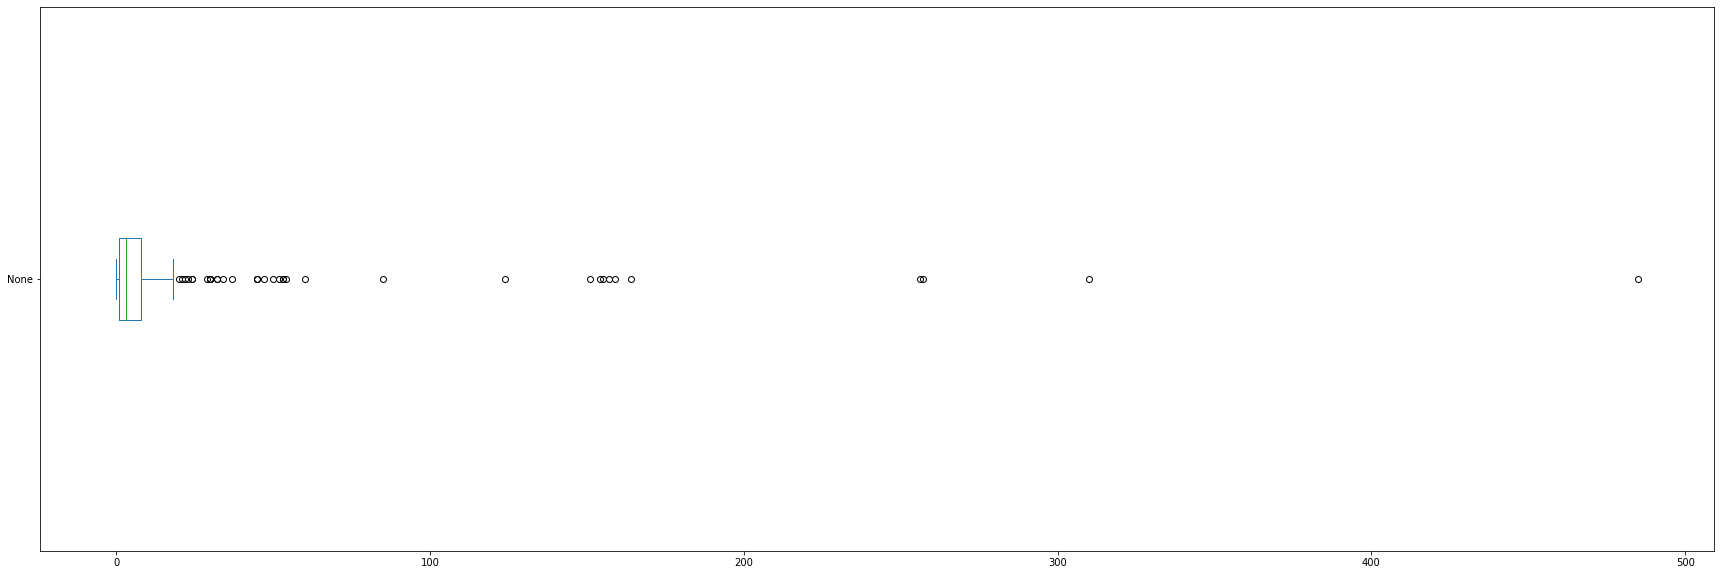

In [15]:
# Wie viele Genres kommen nur einmal vor

display(genres_occurences[genres_occurences <= 60])
display(genres_occurences.describe())
boxplot = genres_occurences.plot.box(figsize=(30, 10), vert=False)

Genres sollen nun nacheinander gruppiert werden. <br> Wir nehmen die Genreauflistung aus [Wikipedia List of music genres and styles](https://en.wikipedia.org/wiki/List_of_music_genres_and_styles). <br>Wenn ein Song zu einem Untergenre gehört, erhält er stattdessen das Genre der Obergruppe

In [9]:
pop = []
hiphop = []
rock = []
rap = []
electro = []
soul = []
house = []
indie = []
country = []
funk = []

for item in genre_df.columns:
    if 'pop' in item:
        pop.append(item)
    if 'hiphop' in item:
        hiphop.append(item)
    if 'rap' in item:
        rap.append(item)
    if 'rock' in item:
        rock.append(item)
    if 'metal' in item: #gehört zu Genre Rock
        rock.append(item)
    if 'electro' in item:
        electro.append(item)
    if 'drill' in item:
        electro.append(item)
    if 'soul' in item:
        soul.append(item)
    if 'funk' in item:
        soul.append(item)
    if 'house' in item:
        house.append(item)
    if 'indie' in item:
        indie.append(item)
    if 'country' in item:
        country.append(item)
    if 'funk' in item:
        funk.append(item)

print(len(pop) + len(hiphop) + len(rock) + len(rap) + len(electro) + len(soul)
      + len(house) + len(indie) +len(country) + len(funk))


269


In [10]:
#pop_genre = pd.Dataframe(genre_df[filtered_pop.index].sum(axis = 1), columns = ['pop'])

df_with_genres = df.copy()
# genres_aggregated = pd.DataFrame(index=np.arange(len(df)))
df_with_genres["pop"] = 0
df_with_genres["hiphop"] = 0
df_with_genres["rap"] = 0
df_with_genres["rock"] = 0
df_with_genres["electro"] = 0
df_with_genres["soul"] = 0
df_with_genres["house"] = 0
df_with_genres["indie"] = 0
df_with_genres["country"] = 0
df_with_genres["funk"] = 0

for item in pop:
    df_with_genres["pop"] = df_with_genres["pop"] + genre_df[item]
for item in hiphop:
    df_with_genres["hiphop"] = df_with_genres["hiphop"] + genre_df[item]
for item in rap:
    df_with_genres["rap"] = df_with_genres["rap"] + genre_df[item]
for item in rock:
    df_with_genres["rock"] = df_with_genres["rock"] + genre_df[item]
for item in electro:
    df_with_genres["electro"] = df_with_genres["electro"] + genre_df[item]
for item in soul:
    df_with_genres["soul"] = df_with_genres["soul"] + genre_df[item]
for item in house:
    df_with_genres["house"] = df_with_genres["house"] + genre_df[item]
for item in indie:
    df_with_genres["indie"] = df_with_genres["indie"] + genre_df[item]
for item in country:
    df_with_genres["country"] = df_with_genres["country"] + genre_df[item]
for item in funk:
    df_with_genres["funk"] = df_with_genres["funk"] + genre_df[item]



In [11]:
df_with_genres[["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"]] = np.where(df_with_genres[["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"]] > 1.0, 1.0, df_with_genres[["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"]])

Genre-Verteilung nach Zusammenfassung

In [19]:
df_genre_sum = pd.DataFrame(df_with_genres[["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"]].sum(axis = 1), columns = ['sum'])

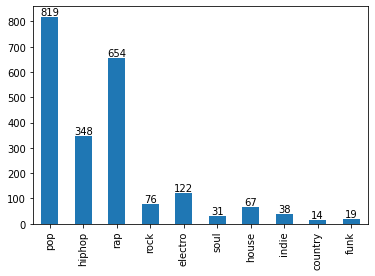

In [20]:
genres_aggregated_hist = df_with_genres[["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"]].sum()
ax = genres_aggregated_hist.plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

Welche Songs sind ohne Genre?


In [21]:
df_with_genres = df_with_genres.dropna()

In [22]:
songs_without_genre = df_genre_sum[df_genre_sum['sum'] == 0]

In [23]:
songs_without_genre

sum
11    0.0
42    0.0
61    0.0
68    0.0
72    0.0
...   ...
1426  0.0
1438  0.0
1445  0.0
1483  0.0
1552  0.0

[81 rows x 1 columns]

## Bisher unbrauchbare Spalten entfernen und Daten skalieren

In [12]:
df_not_aggregated_genres = pd.concat([df, genre_df], axis=1)

In [13]:
#Dummy variablen
# encoder = ce.OneHotEncoder(cols=['Genre'], handle_unknown='return_nan', return_df=True, use_cat_names=True)
# df_final = encoder.fit_transform(df)


movement_data = ['Highest Charting Position',
                 'Number of Times Charted',
                 'Streams',
                 'Popularity',
                 'Artist Followers']


# df_final = df_not_aggregated_genres.copy()
df_final = df_with_genres.copy()
# df_final.drop(['Artist', 'Song ID', 'Song Name', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre', 'Start Highest Charting', *movement_data], inplace=True, axis=1)

#
# unbrauchbare features entfernen
#
# df_final = df_final.drop(['Artist', 'Song ID', 'Song Name', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre', 'Start Highest Charting'], axis=1)

#
# zusätzlich kategoriale features entfernen
#
df_final = df_final.drop(['Artist', 'Song ID', 'Song Name', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre', 'Start Highest Charting', 'Chord', 'pop', 'hiphop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie', 'country', 'funk'], axis=1)

In [26]:
df_final.head()

Highest Charting Position  Number of Times Charted   Streams  \
0                          1                 0.903090  7.686935   
1                          2                 0.477121  7.674390   
2                          1                 1.041393  7.603821   
3                          3                 0.698970  7.577486   
4                          5                 0.000000  7.530820   

   Artist Followers  Release Date  Popularity  Danceability    Energy  \
0          6.528629     18.179750    2.000000     -0.146302 -0.096910   
1          6.348309     18.211064    1.995635     -0.228413 -0.116907   
2          6.797026     18.209932    1.995635     -0.249492 -0.177832   
3          7.920610     18.210741    1.991226     -0.092589 -0.047208   
4          6.738270     18.211387    1.982271     -0.133122 -0.152427   

   Loudness  Speechiness  ...  pop  hiphop  rap  rock electro  soul  house  \
0  0.681964    -1.297569  ...  1.0     0.0  0.0   1.0     0.0   0.0    0.0   
1  0.739097    -1.316053  ...  0.0     1.0  0.0   0.0     0.0   0.0    0.0   
2  0.702775    -0.812479  ...  1.0     0.0  0.0   0.0     0.0   0.0    0.0   
3  0.569608    -1.458421  ...  1.0     0.0  0.0   0.0     0.0   0.0    0.0   
4  0.869760    -1.211125  ...  1.0     0.0  1.0   0.0     0.0   0.0    0.0   

   indie  country  funk  
0    1.0      0.0   0.0  
1    0.0      0.0   0.0  
2    0.0      0.0   0.0  
3    0.0      0.0   0.0  
4    0.0      0.0   0.0  

[5 rows x 26 columns]

### Normalisierung der Daten

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
# scaler = RobustScaler()

#
# wenn Daten nicht logarithmiert sind
#

scaler.fit(df_final[['Tempo', 'Loudness','Duration(s)', 'Release Date', *movement_data]])
df_final[['Tempo', 'Loudness','Duration(s)', 'Release Date', *movement_data]] = scaler.transform(df_final[['Tempo', 'Loudness','Duration(s)', 'Release Date', *movement_data]])


#
# falls Daten logarithmiert
#
"""
scaler.fit(df_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]])
df_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]] = scaler.transform(df_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]])
"""

"\nscaler.fit(df_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]])\ndf_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]] = scaler.transform(df_final[['Streams','Release Date','Danceability','Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness','Tempo', 'Valence', 'Duration(s)',*movement_data]])\n"

## Untersuchung des Datensatzes und Auswahl der Spalten

In [63]:
display(df_final)
display(df_final.describe())

Highest Charting Position  Number of Times Charted   Streams  \
0                      0.000000                 0.049645  1.000000   
1                      0.005025                 0.014184  0.968853   
2                      0.000000                 0.070922  0.809460   
3                      0.010050                 0.028369  0.756306   
4                      0.020101                 0.000000  0.669684   
...                         ...                      ...       ...   
1551                   0.974874                 0.000000  0.010225   
1552                   0.979899                 0.000000  0.010053   
1553                   0.984925                 0.000000  0.010005   
1554                   0.989950                 0.000000  0.009701   
1555                   0.994975                 0.000000  0.009433   

      Artist Followers  Release Date  Popularity  Danceability    Energy  \
0             0.040475      0.954109    1.000000      0.679518  0.814410   
1             0.026702      0.999140    0.985915      0.531325  0.775109   
2             0.075140      0.997454    0.985915      0.497590  0.665939   
3             0.999467      0.998658    0.971831      0.792771  0.920306   
4             0.065625      0.999622    0.943662      0.706024  0.709607   
...                ...           ...         ...           ...       ...   
1551          0.325955      0.947607    0.704225      0.737349  0.705240   
1552          0.180172      0.977227    0.521127      0.455422  0.890830   
1553          0.272328      0.955313    0.732394      0.740964  0.512009   
1554          0.002445      0.976676    0.436620      0.821687  0.541485   
1555          0.506675      0.978362    0.577465      0.359036  0.599345   

      Loudness  Speechiness  Acousticness  Liveness     Tempo   Valence  \
0     0.763187     0.031599      0.127744  0.360076  0.550500  0.588173   
1     0.737844     0.029159      0.038507  0.088401  0.777085  0.470961   
2     0.754339     0.151952      0.337005  0.069192  0.758164  0.692714   
3     0.804274     0.013476      0.047159  0.365383  0.500196  0.590285   
4     0.665679     0.044493      0.020397  0.032261  0.651368  0.910243   
...        ...          ...           ...       ...       ...       ...   
1551  0.717713     0.053671      0.002600  0.141462  0.437422  0.608237   
1552  0.826354     0.071910      0.241429  0.332484  0.666347  0.720169   
1553  0.780993     0.007900      0.185090  0.119176  0.367509  0.382260   
1554  0.680037     0.041241      0.250484  0.172238  0.677031  0.896515   
1555  0.674414     0.047398      0.435599  0.070572  1.000000  0.411827   

      Duration(s)  
0        0.325134  
1        0.200129  
2        0.265255  
3        0.360046  
4        0.325923  
...           ...  
1551     0.321120  
1552     0.272035  
1553     0.335434  
1554     0.219802  
1555     0.342602  

[1470 rows x 15 columns]

Highest Charting Position  Number of Times Charted      Streams  \
count                1470.000000              1470.000000  1470.000000   
mean                    0.437620                 0.067704     0.049136   
std                     0.291640                 0.115186     0.077244   
min                     0.000000                 0.000000     0.000000   
25%                     0.185930                 0.000000     0.016608   
50%                     0.402010                 0.014184     0.024638   
75%                     0.683417                 0.078014     0.051815   
max                     1.000000                 1.000000     1.000000   

       Artist Followers  Release Date   Popularity  Danceability       Energy  \
count       1470.000000   1470.000000  1470.000000   1470.000000  1470.000000   
mean           0.184993      0.965549     0.607033      0.651778     0.633253   
std            0.201534      0.094778     0.146359      0.171160     0.174186   
min            0.000000      0.000000     0.000000      0.000000     0.000000   
25%            0.034716      0.980357     0.521127      0.540964     0.524017   
50%            0.091155      0.985173     0.619718      0.672892     0.641921   
75%            0.321309      0.991916     0.718310      0.780723     0.758734   
max            1.000000      1.000000     1.000000      1.000000     1.000000   

          Loudness  Speechiness  Acousticness     Liveness        Tempo  \
count  1470.000000  1470.000000   1470.000000  1470.000000  1470.000000   
mean      0.705592     0.118486      0.245608     0.172820     0.479104   
std       0.093026     0.129146      0.249264     0.154503     0.187564   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.662849     0.026313      0.048265     0.082325     0.318647   
50%       0.718632     0.063662      0.157926     0.110687     0.474867   
75%       0.766054     0.170539      0.373223     0.209381     0.607689   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

           Valence  Duration(s)  
count  1470.000000  1470.000000  
mean      0.506355     0.302120  
std       0.238112     0.084778  
min       0.000000     0.000000  
25%       0.327614     0.251587  
50%       0.504224     0.294855  
75%       0.691130     0.340294  
max       1.000000     1.000000

### Boxplot und Scatterplot

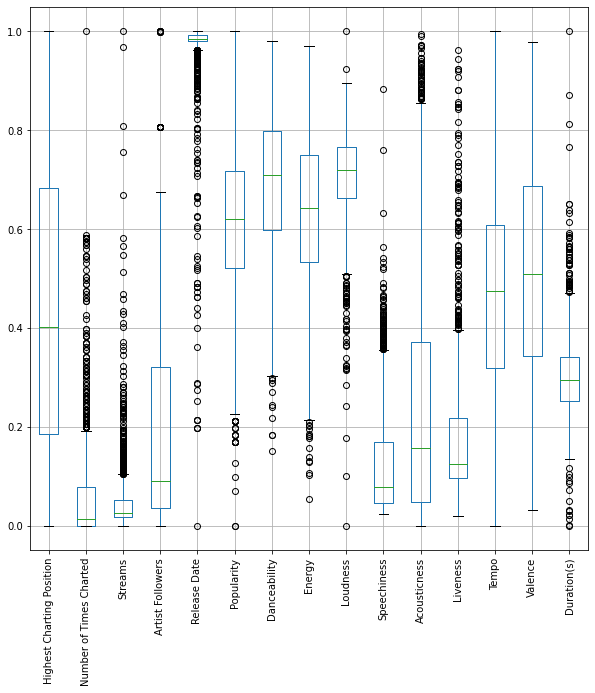

In [15]:
# choosen_columns = df_final.drop(['Chord'], axis=1).columns.tolist()

# falls Genres entfernt wurden
choosen_columns = df_final.columns.tolist()
boxplot = df_final.boxplot(column=choosen_columns, figsize=(10, 10), vert=True, rot=90)

array([[<AxesSubplot:xlabel='Highest Charting Position', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Number of Times Charted', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Streams', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Artist Followers', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Release Date', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Popularity', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Danceability', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Energy', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Loudness', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Speechiness', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Acousticness', ylabel='Highest Charting Position'>,
        <AxesSubplot:xlabel='Liveness', ylabel='Highest Charting Position'>,
        <AxesSubplot:x

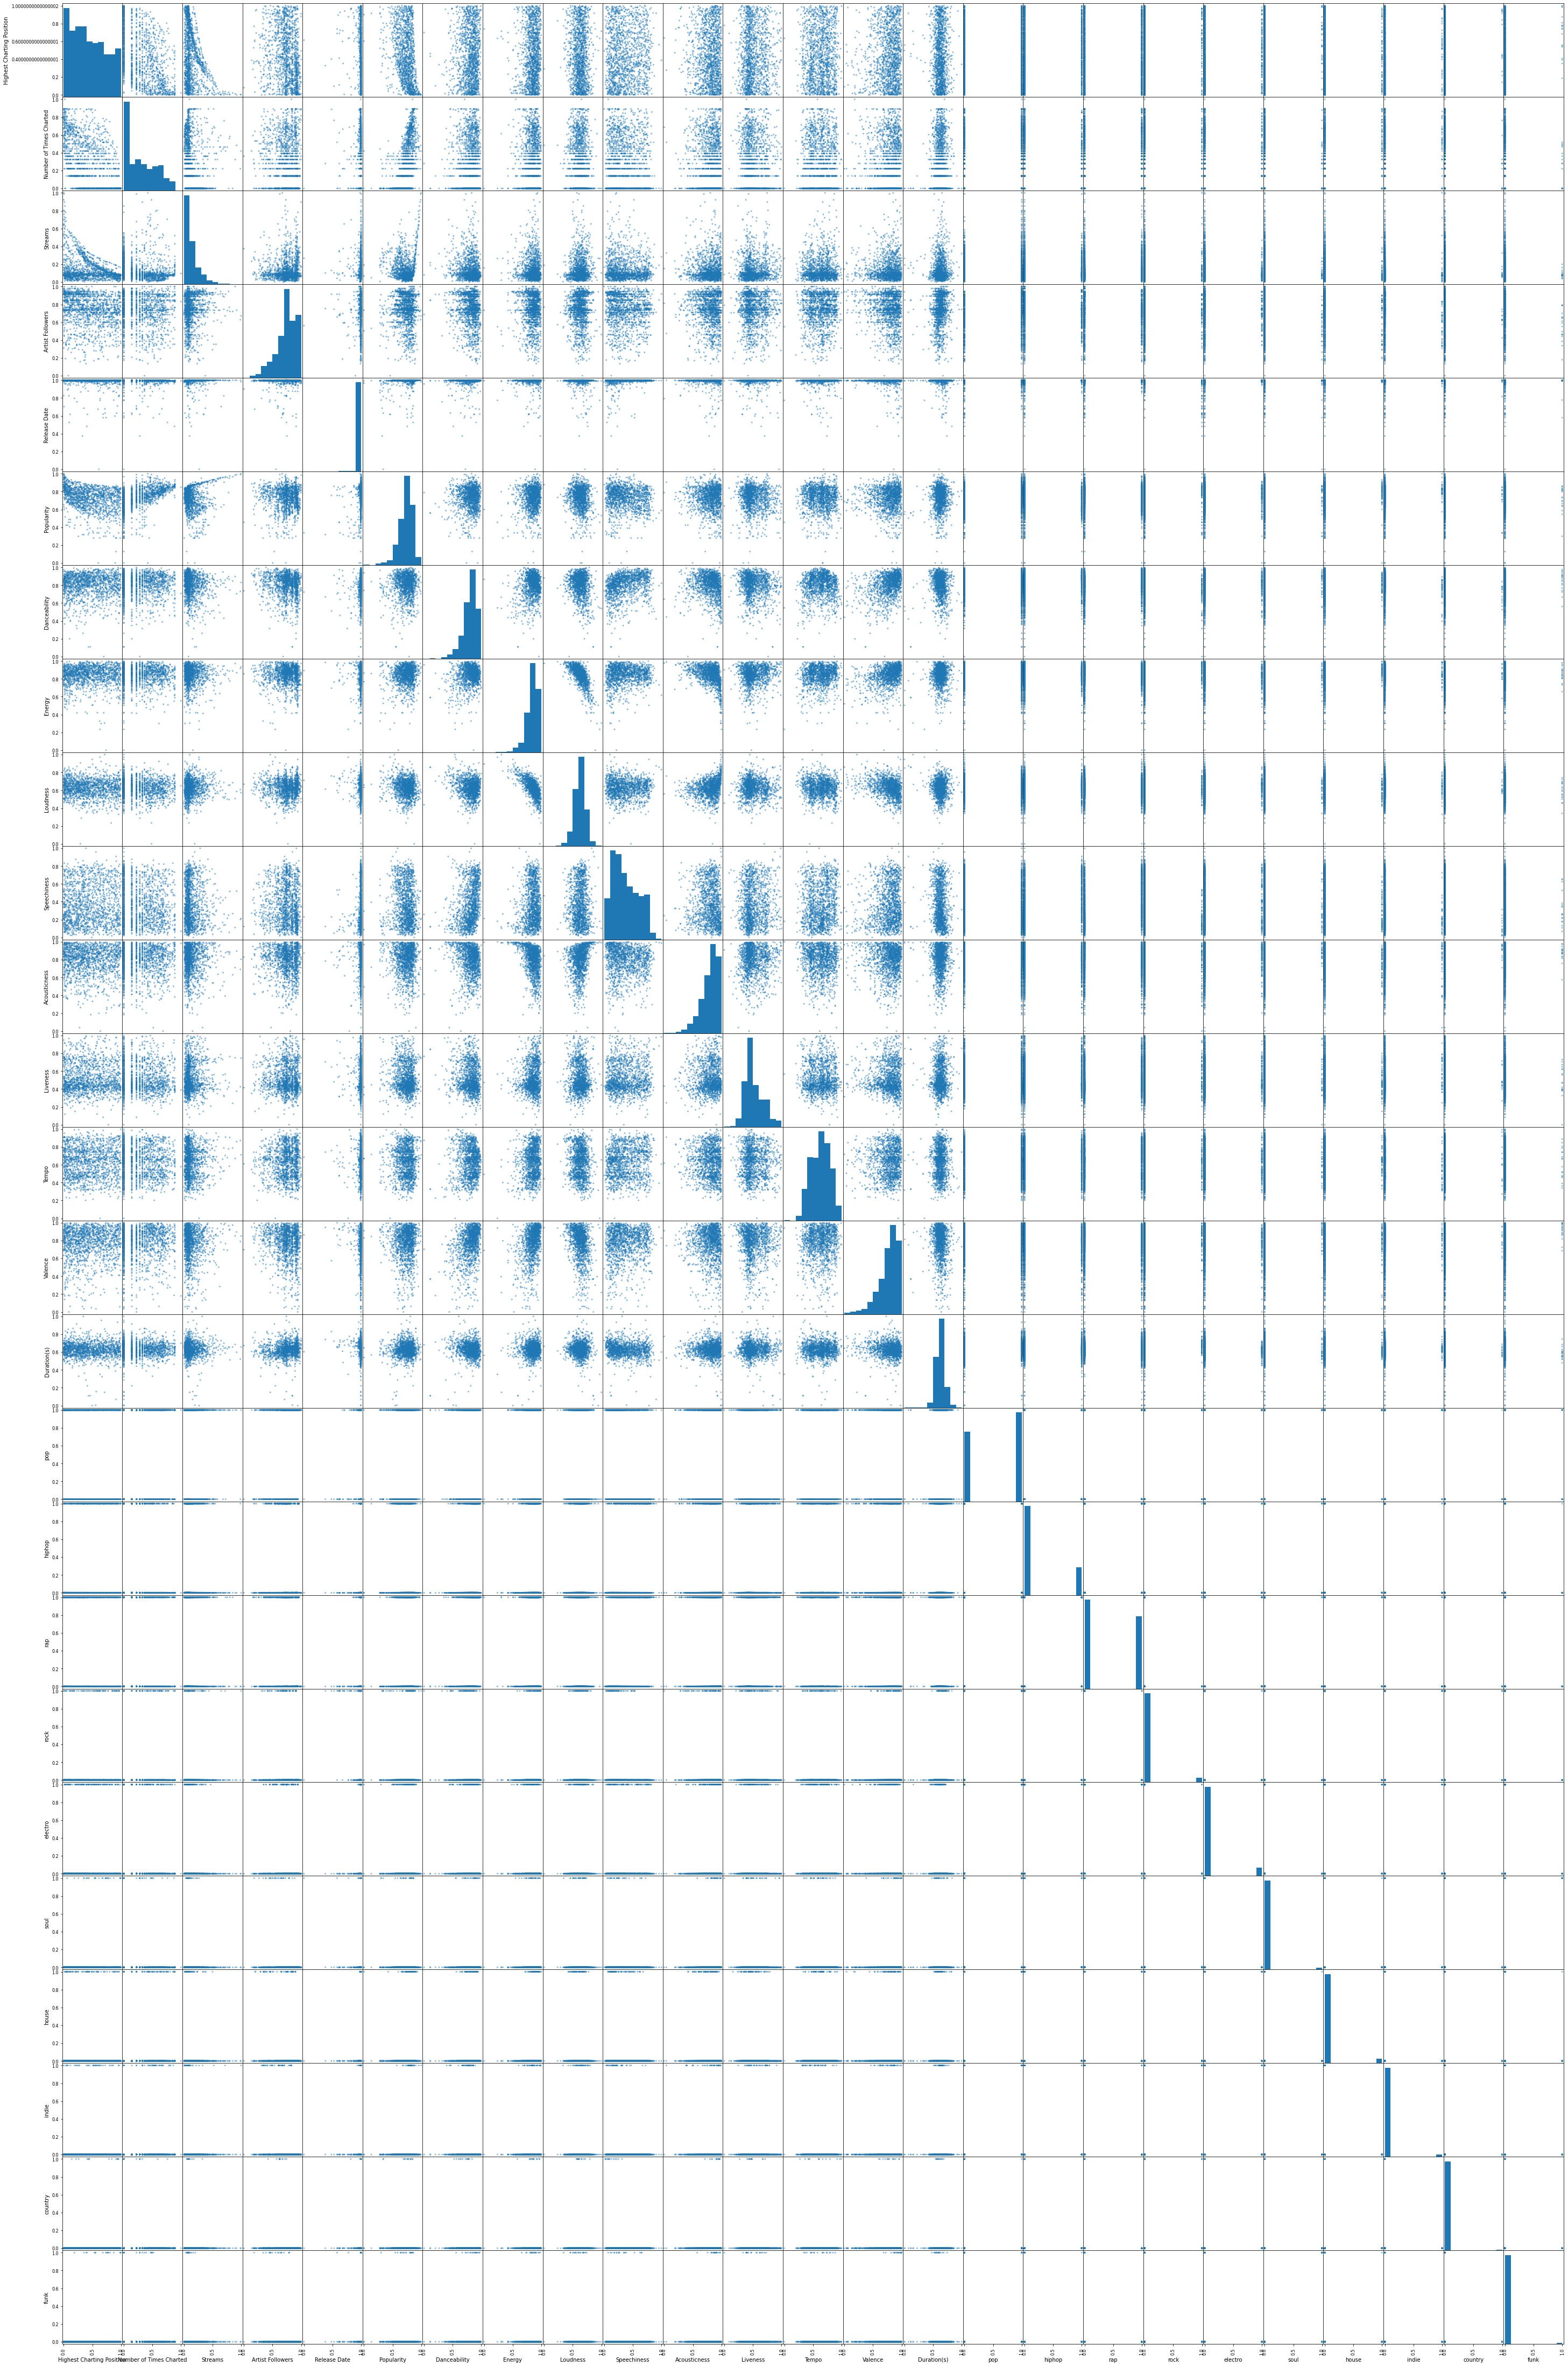

In [30]:
pd.plotting.scatter_matrix(df_final, figsize=(50, 80))

### Correlation Matrix

In [31]:
#Remove high correlated variables
#nicht ausführen, FALLS NÖTIG
"""
df_o = df_final.copy()

df_o.drop(['Chord'], inplace=True, axis=1)
df_corr = df_o.corr()

threshold = 0.95

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_o.columns[columns]
selected_columns
df_final = df_o[selected_columns]
print(selected_columns)
"""

"\ndf_o = df_final.copy()\n\ndf_o.drop(['Chord'], inplace=True, axis=1)\ndf_corr = df_o.corr()\n\nthreshold = 0.95\n\ncolumns = np.full((df_corr.shape[0],), True, dtype=bool)\nfor i in range(df_corr.shape[0]):\n    for j in range(i+1, df_corr.shape[0]):\n        if df_corr.iloc[i,j] >= threshold:\n            if columns[j]:\n                columns[j] = False\nselected_columns = df_o.columns[columns]\nselected_columns\ndf_final = df_o[selected_columns]\nprint(selected_columns)\n"

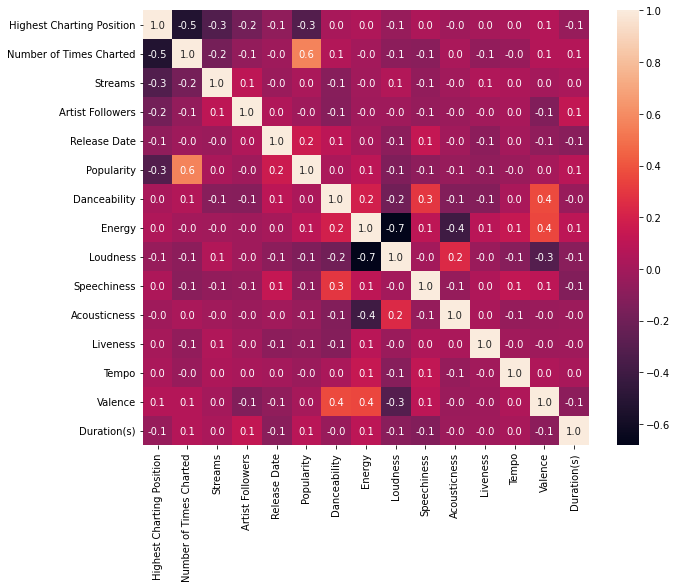

In [32]:
import seaborn as sns
%matplotlib inline

#Korrelation's plot
df_o = df_final.copy()

df_o.drop(["pop", "hiphop", "rap", "rock", "electro", "soul", "house", "indie", "country", "funk"], inplace=True, axis=1)
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_o.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

### Variance inflation factor
nicht berücksichtigen – wird für supervised learning (z.B. lin. Regression) verwendet

In [33]:
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Die Kopie testet, wie VIF funktioniert und ob es mit kategorialen Merkmalen funktioniert
# df_cpy = df.loc[:, ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]
# df_cpy = df.loc[:, ['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]
# df_cpy = df.loc[:, ['Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]
# df_cpy = df.loc[:, ['Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]
df_cpy = df_final.copy()

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_cpy.values, i) for i in range(df_cpy.shape[1])]
vif['variable'] = df_cpy.columns
print(vif)
# ==> TODO: für VIF müssen kategorielle Merkmale in numerische Umgewandelt werden
"""

"\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Die Kopie testet, wie VIF funktioniert und ob es mit kategorialen Merkmalen funktioniert\n# df_cpy = df.loc[:, ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]\n# df_cpy = df.loc[:, ['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]\n# df_cpy = df.loc[:, ['Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]\n# df_cpy = df.loc[:, ['Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)']]\ndf_cpy = df_final.copy()\n\nvif = pd.DataFrame()\nvif['VIF'] = [variance_inflation_factor(df_cpy.values, i) for i in range(df_cpy.shape[1])]\nvif['variable'] = df_cpy.columns\nprint(vif)\n# ==> TODO: für VIF müssen kategorielle Merkmale in numerische Umgewandelt werden\n"

Lässt man alle Spalten, dann entstehen im optimalen Fall (bezüglich Silhouette-Coefficient) nur zwei Cluster.
Evtl. sind bestimmte features nicht notwendig bzw. sollten entfernt werden. Außerdem könnte man Genre-features zusammenfassen.

## Applying of Clustering

In [34]:
# df_final = df_final.drop(['Streams', 'Release Date', 'Duration(s)'], axis=1)

In [17]:
import numpy as np
import gower
from sklearn.metrics.pairwise import euclidean_distances
X = np.asarray(df_final)

# Für verschieden skalierte Daten (metrisch, kategriell, etc.) benutze die Gower-Distanz
# dist_matrix = gower.gower_matrix(data_x=X)

# Für Daten, die nur metrisch skaliert sind, benutze Euklidische Distanz
dist_matrix = euclidean_distances(X)

In [73]:
display(dist_matrix)
# print(dist_matrix.mean())
# print(len(dist_matrix))

array([[0.        , 0.4373782 , 0.5438602 , ..., 1.5203342 , 1.5989823 ,
        1.71442777],
       [0.4373782 , 0.        , 0.45016656, ..., 1.52910596, 1.60589626,
        1.6108214 ],
       [0.5438602 , 0.45016656, 0.        , ..., 1.45018932, 1.46242259,
        1.47733097],
       ...,
       [1.5203342 , 1.52910596, 1.45018932, ..., 0.        , 0.74847525,
        0.84383541],
       [1.5989823 , 1.60589626, 1.46242259, ..., 0.74847525, 0.        ,
        0.94365886],
       [1.71442777, 1.6108214 , 1.47733097, ..., 0.84383541, 0.94365886,
        0.        ]])

In [37]:

dist_matrix_plot = np.triu(dist_matrix)
dist_matrix_plot = np.setdiff1d(dist_matrix_plot, 0)


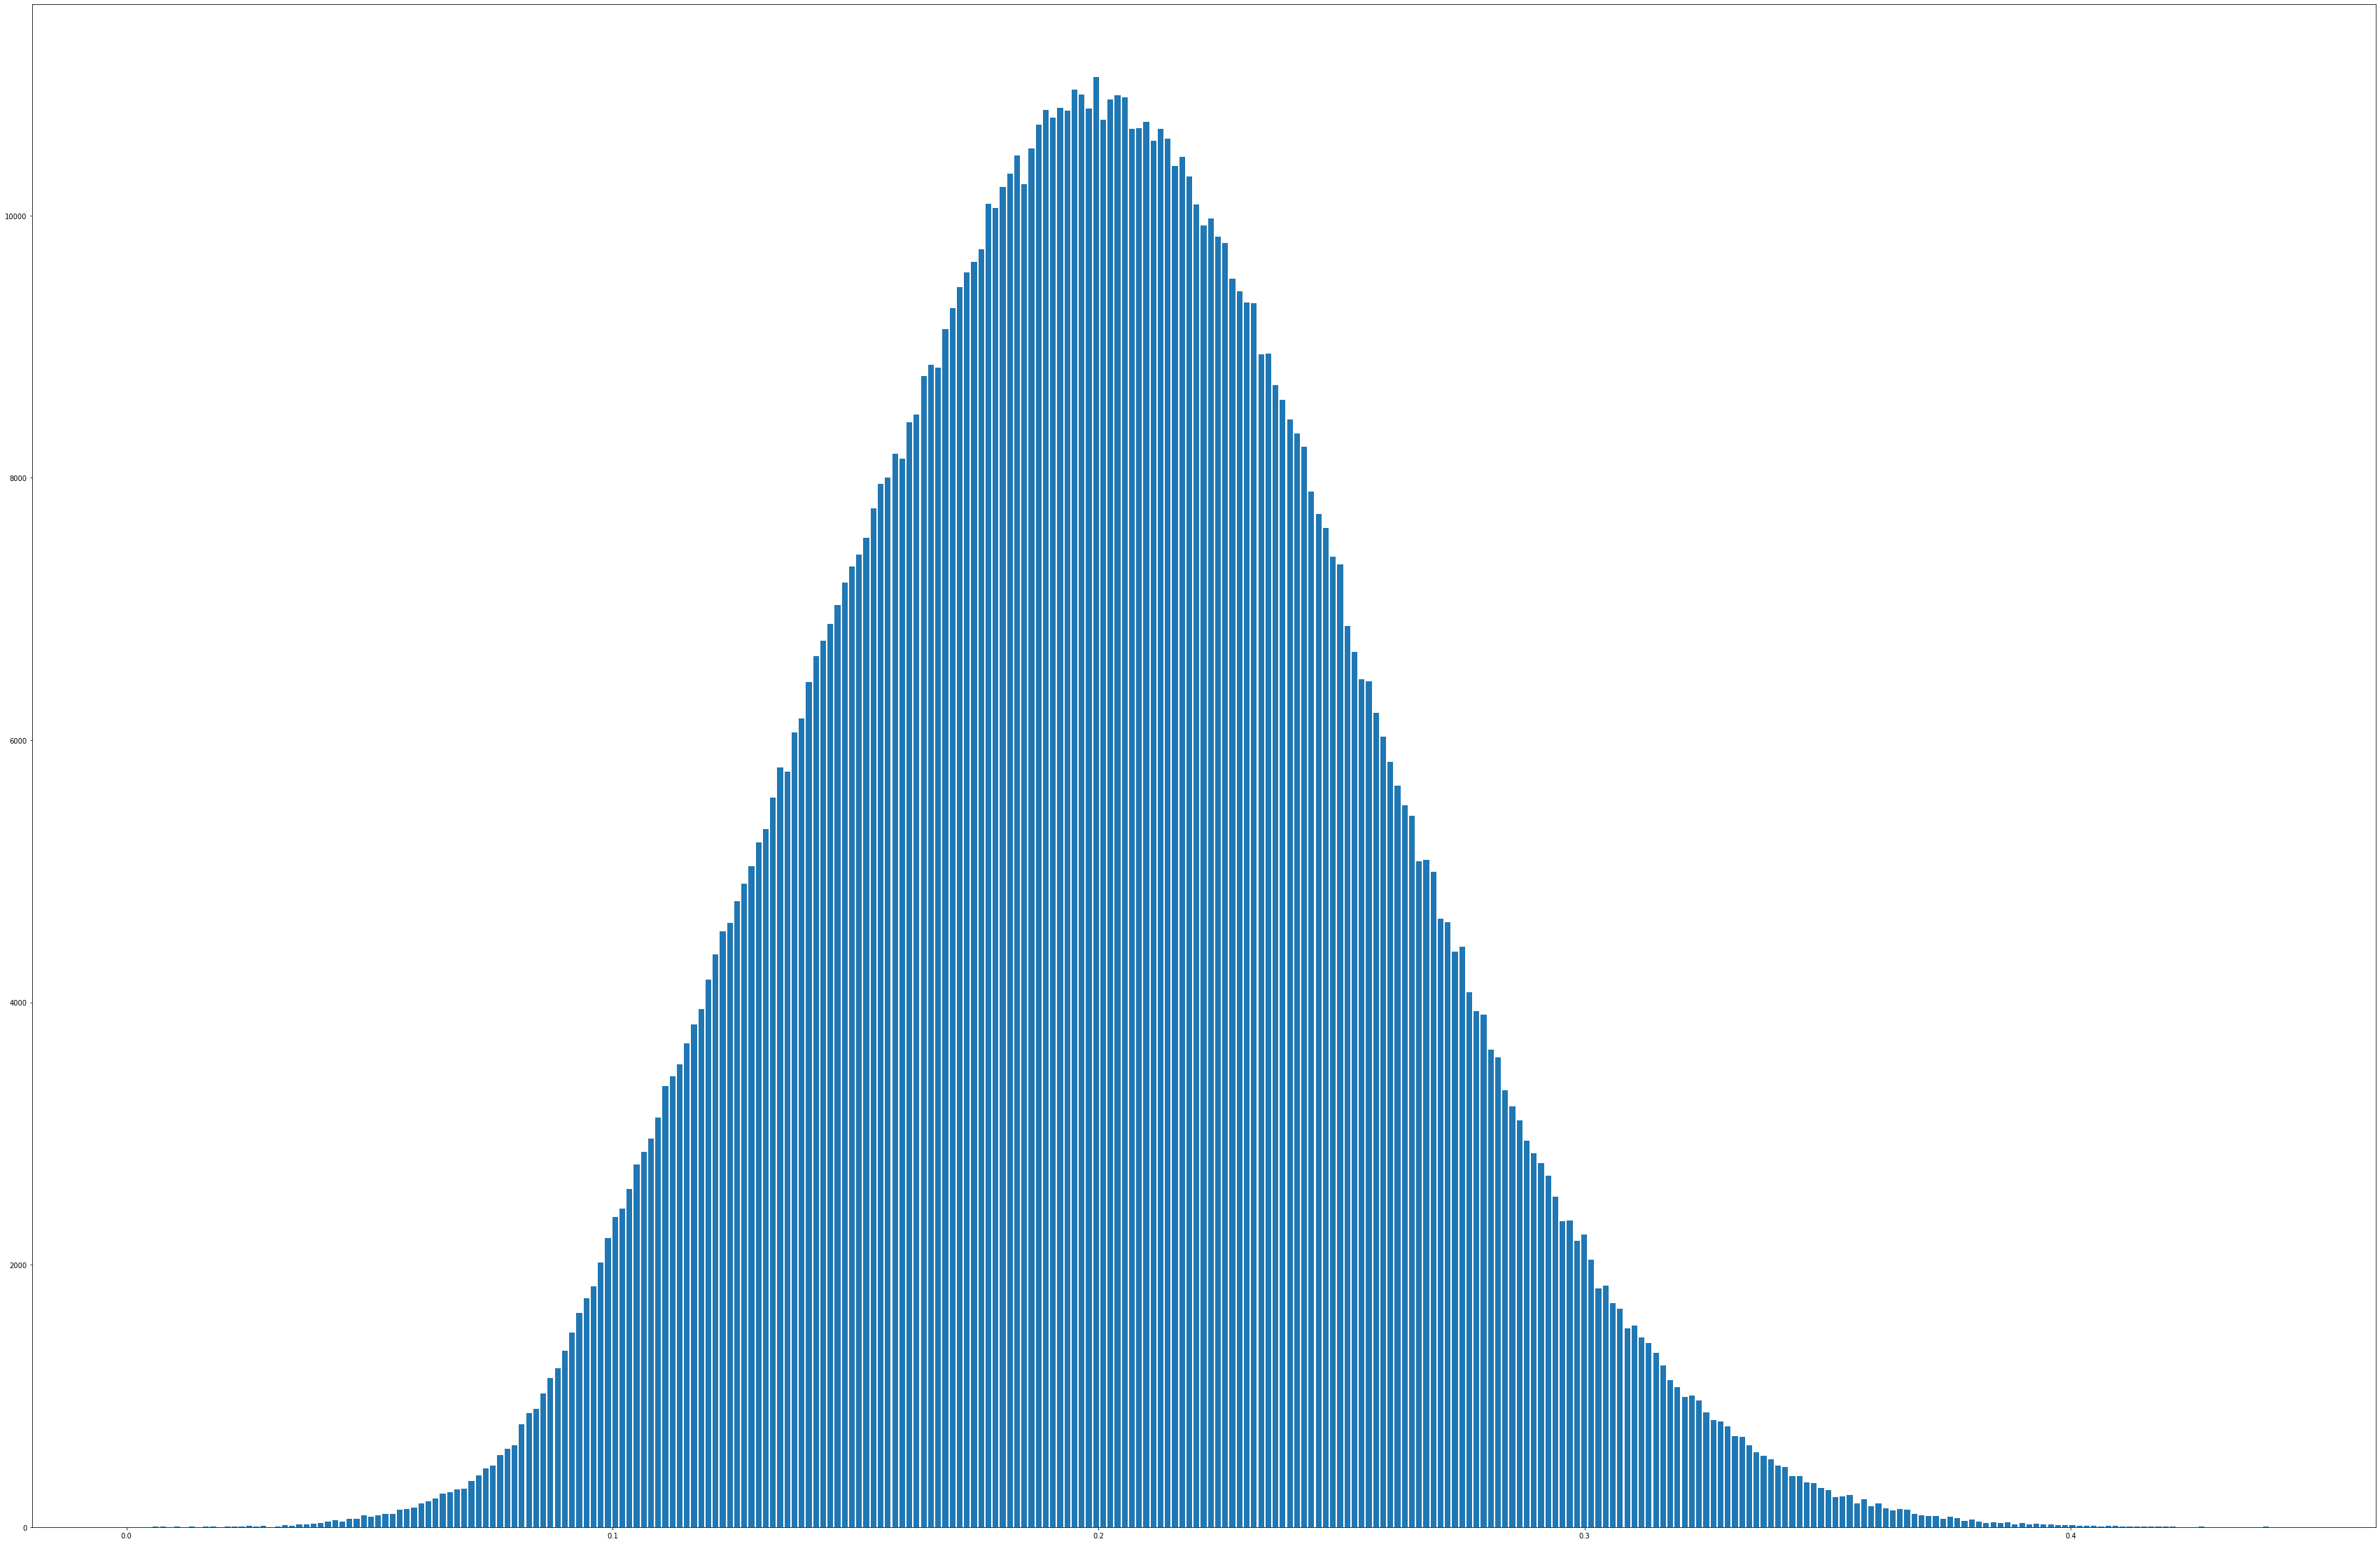

In [38]:

plt.figure(figsize=(60, 40))
_ = plt.hist(dist_matrix_plot, bins='auto', rwidth=0.8)
plt.show()


In [19]:
from sklearn.cluster import DBSCAN

In [22]:
db = DBSCAN(eps=0.61307393, metric = "precomputed", n_jobs=-1).fit(dist_matrix)

## Cluster Plotting

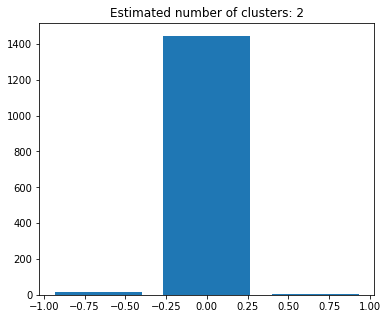

In [26]:
_labels = np.array(db.labels_)
plt.figure(figsize=(6, 5))
number_clusters = len(np.unique(_labels))
plt.hist(_labels, bins=number_clusters, rwidth=0.8)
plt.title(f"Estimated number of clusters: { number_clusters-1}" )
plt.show()

## Analyse der Labels und Cluster-Qualität

In [42]:
from sklearn.metrics import silhouette_score

In [27]:
print(f'number of values: {len(_labels)}')
print(f'all labels: {np.unique(_labels)}')
display(np.histogram(_labels, bins=number_clusters))
print(f'silhouette score: {silhouette_score(X=dist_matrix, labels=db.labels_, metric="precomputed")}')

number of values: 1470
all labels: [-1  0  1]


(array([  18, 1445,    7]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

silhouette score: 0.3284784251521221


In [44]:
print(1437/1470)
print(98.98-97.76)

0.9775510204081632
1.2199999999999989


### Silhouette Coefficient
epsilon für DBSCAN anhand Silhouette Koeffizienten bestimmen

In [20]:
from sklearn.metrics import silhouette_score

silhouettes_scores = np.array([])

min_eps = dist_matrix[dist_matrix != 0.0].min()
max_eps = dist_matrix.max()
eps_array = np.linspace(min_eps, max_eps, num=250)

print(f'min_eps: {min_eps} max_eps: {max_eps}')
for f in eps_array:
    db = DBSCAN(eps=f, metric="precomputed", n_jobs=-1).fit(dist_matrix)
    if len(np.unique(db.labels_)) < 3:
        eps_array = np.setdiff1d(eps_array, f)
        continue
    silhouette = silhouette_score(X=dist_matrix, labels=db.labels_, metric="precomputed")
    silhouettes_scores = np.append(silhouettes_scores, silhouette)

min_eps: 0.021876522540473953 max_eps: 2.252303100190925


In [25]:
print(f'eps_array: \n {eps_array}')
print(f'silhouettes_scores: \n {silhouettes_scores}')
best_score = silhouettes_scores.max()
print(f' best score: {best_score}')
print(f'best epsilon: {eps_array[np.where(silhouettes_scores==best_score)]}')

eps_array: 
 [0.21894232 0.22789986 0.2368574  0.24581493 0.25477247 0.26373001
 0.27268754 0.28164508 0.29060262 0.29956015 0.30851769 0.31747523
 0.32643276 0.3353903  0.34434783 0.41600813 0.42496566 0.4339232
 0.44288074 0.58620132 0.59515886 0.60411639 0.61307393 0.62203147]
silhouettes_scores: 
 [-0.23154678 -0.30373917 -0.34301781 -0.35611746 -0.33663274 -0.31663939
 -0.29439462 -0.27170642 -0.26080099 -0.25147319 -0.22056416 -0.13809626
 -0.07395131  0.02880886  0.03058184  0.16854467  0.17289362  0.14996909
  0.15386099  0.31168041  0.30966621  0.31635748  0.32847843  0.32368247]
 best score: 0.3284784251521221
best epsilon: [0.61307393]
